In [68]:
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten ,Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [70]:
data=pd.read_csv(r'C:\Users\DELLS\OneDrive\Documents\Downloads\time_series_data_human_activities.csv\time_series_data_human_activities.csv')

In [71]:
data.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073623 entries, 0 to 1073622
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1073623 non-null  int64  
 1   activity   1073623 non-null  object 
 2   timestamp  1073623 non-null  int64  
 3   x-axis     1073623 non-null  float64
 4   y-axis     1073623 non-null  float64
 5   z-axis     1073623 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.1+ MB


In [73]:
data.shape

(1073623, 6)

In [74]:
data.isnull().sum()

user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       0
dtype: int64

In [75]:
data['activity'].value_counts()

Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: activity, dtype: int64

In [76]:
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

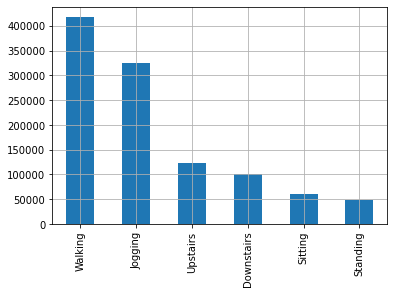

Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: activity, dtype: int64


In [77]:
activity_stats = data.activity.value_counts()
activities = activity_stats.index.tolist()
activity_stats.plot(kind='bar')
plt.grid()
plt.show()
print(activity_stats)

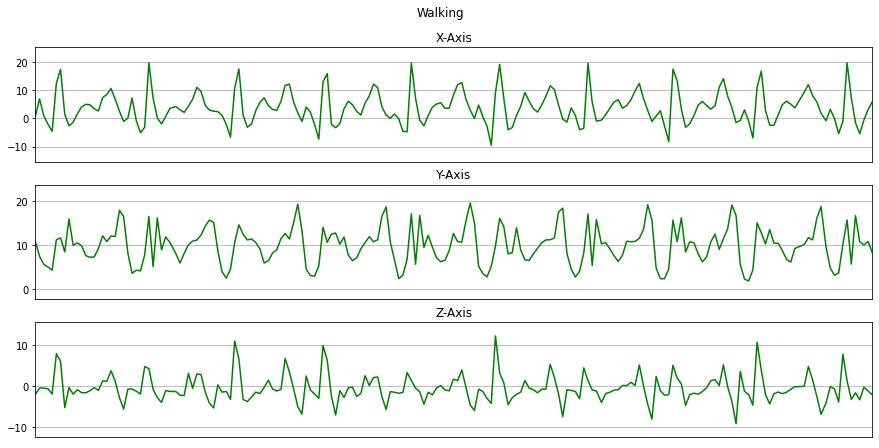

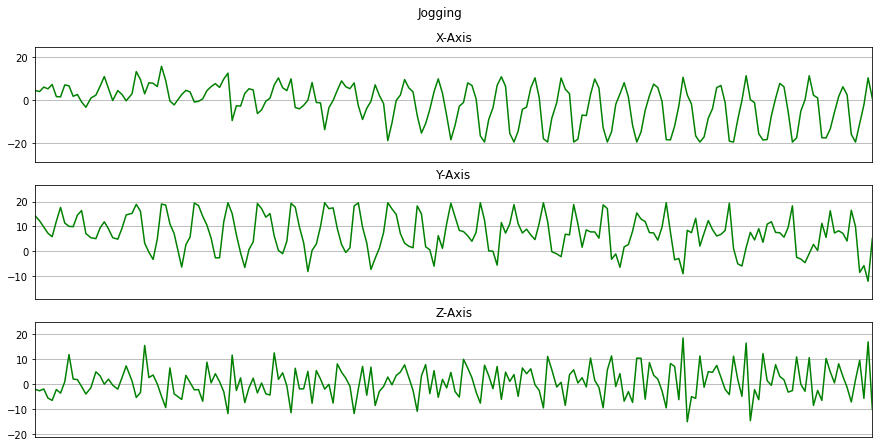

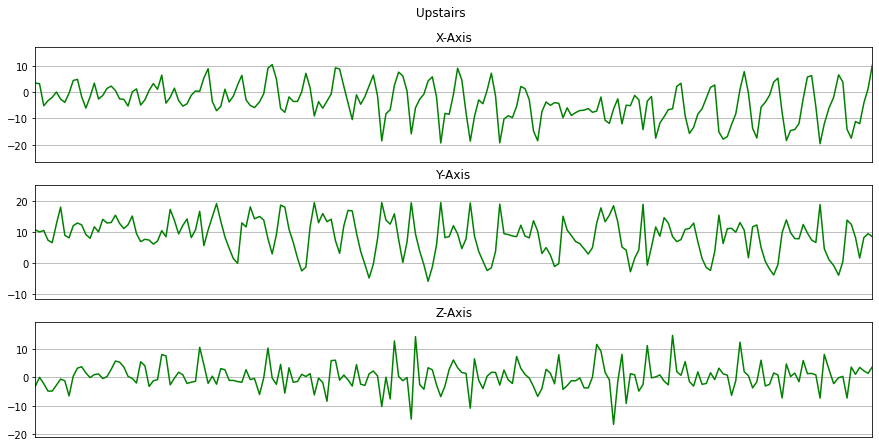

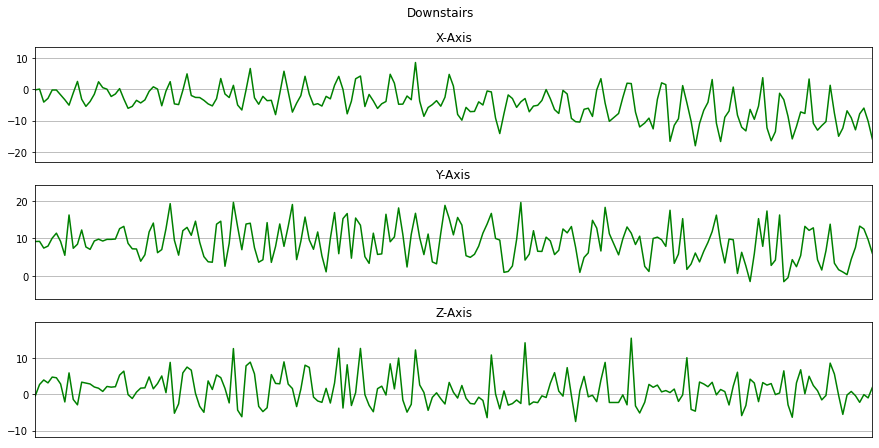

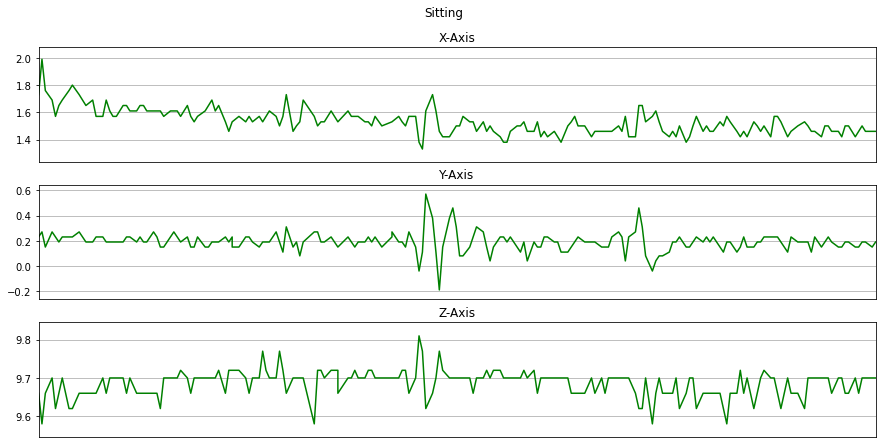

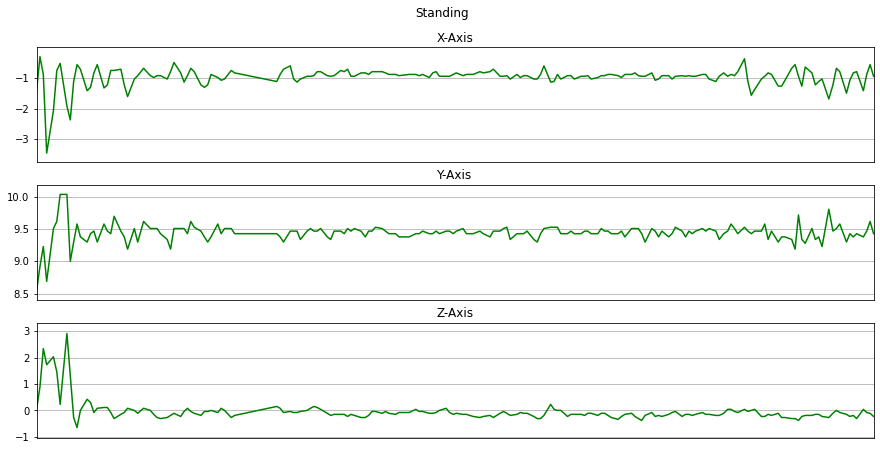

In [78]:
Sample_size=20
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Sample_size*10]
    plot_activity(activity, data_for_plot)


In [79]:
# activity vs. user
pd.crosstab(data.user, data.activity)

activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
user,,,,,,
1,2941,11056,0,0,3120,12861
2,0,11786,0,0,0,11739
3,3326,11018,1609,2824,3411,12970
4,1761,895,1257,0,1377,6079
5,3281,6405,1664,1515,3387,12257
6,1431,10961,1679,709,1661,12262
7,2257,9183,2529,2364,3601,11033
8,3345,10313,2699,3269,4453,17108
9,0,0,0,0,0,12923


In [80]:
sel_user = 3
data_user = data[data.user==sel_user]
data_user

,user,activity,timestamp,x-axis,y-axis,z-axis
53503,3,Walking,100832351478000,2.87,18.81,-0.89
53504,3,Walking,100832391547000,-0.38,8.24,-1.27
53505,3,Walking,100832431556000,1.33,7.16,-1.95
53506,3,Walking,100832471839000,4.06,9.66,-1.84
53507,3,Walking,100832551551000,1.69,6.55,-0.11
...,...,...,...,...,...,...
88656,3,Downstairs,103260241614000,-3.87,7.55,3.30
88657,3,Downstairs,103260321693000,-4.06,8.08,4.79
88658,3,Downstairs,103260365577000,-6.32,8.66,4.94
88659,3,Downstairs,103260403083000,-5.37,11.22,3.06


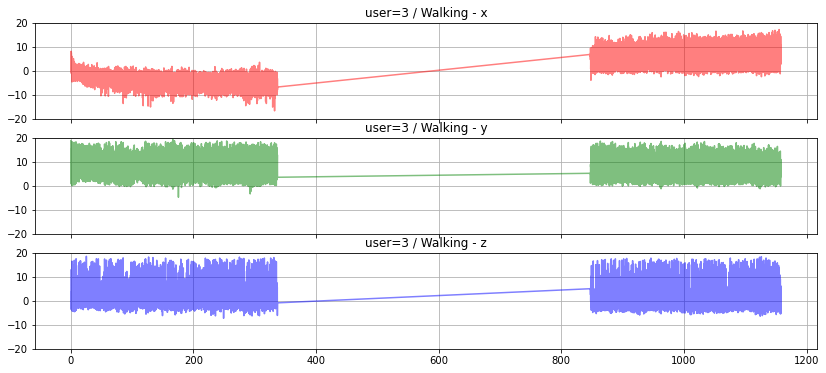

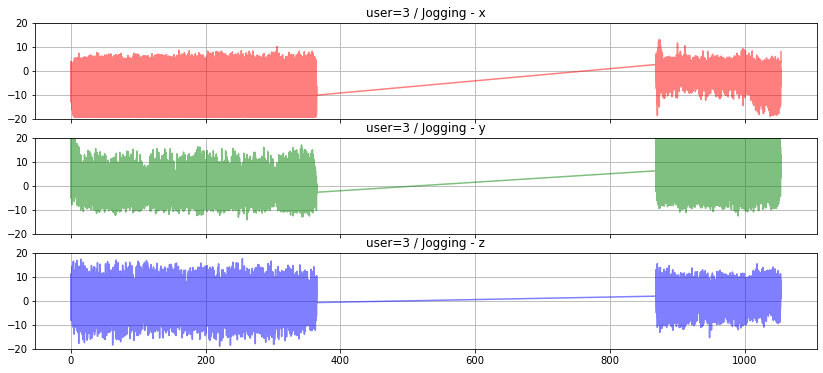

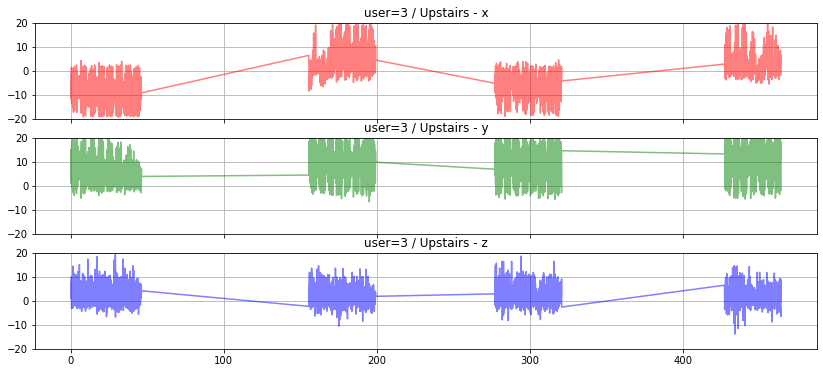

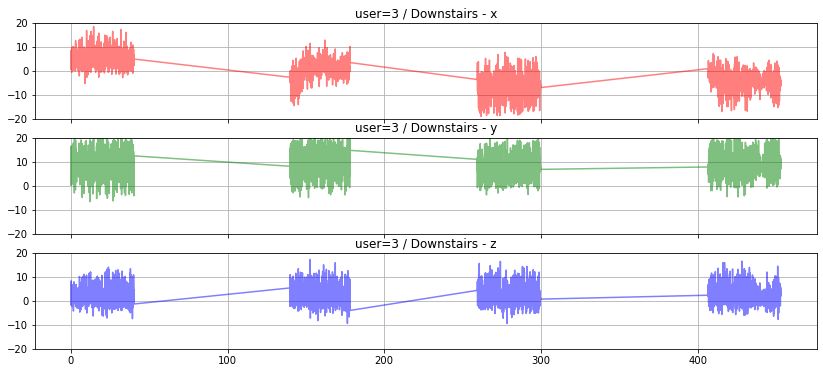

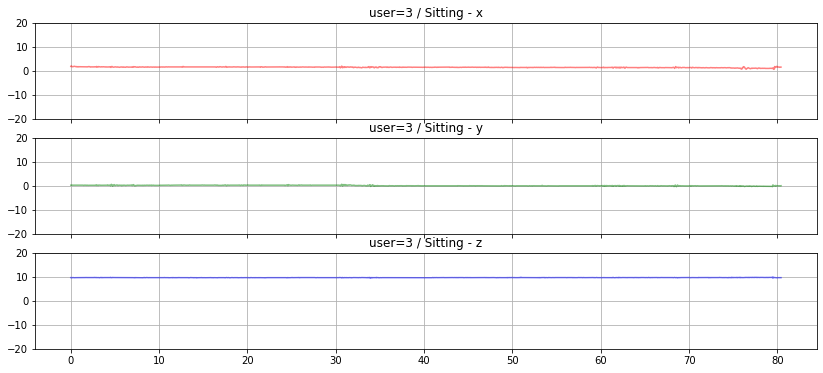

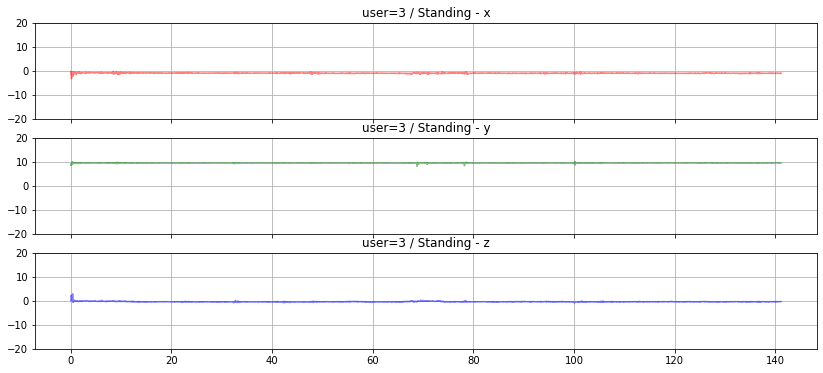

In [81]:
for act in activities:
    data_temp = data_user.loc[data.activity==act].copy()
    data_temp.reset_index(inplace=True)
    
    # convert time to seconds and start with 0
    t_min = data_temp.timestamp.min()
    data_temp['time_sec'] = (data_temp['timestamp'] - t_min)/1e9
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    
    ax1.plot(data_temp['time_sec'], data_temp['x-axis'], color='red', alpha=0.5)
    ax1.set_ylim(-20,20)
    ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.plot(data_temp['time_sec'], data_temp['y-axis'], color='green', alpha=0.5)
    ax2.set_ylim(-20,20)
    ax2.set_title('user=' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.plot(data_temp['time_sec'], data_temp['z-axis'], color='blue', alpha=0.5)
    ax3.set_ylim(-20,20) 
    ax3.set_title('user=' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()
    
    plt.show()

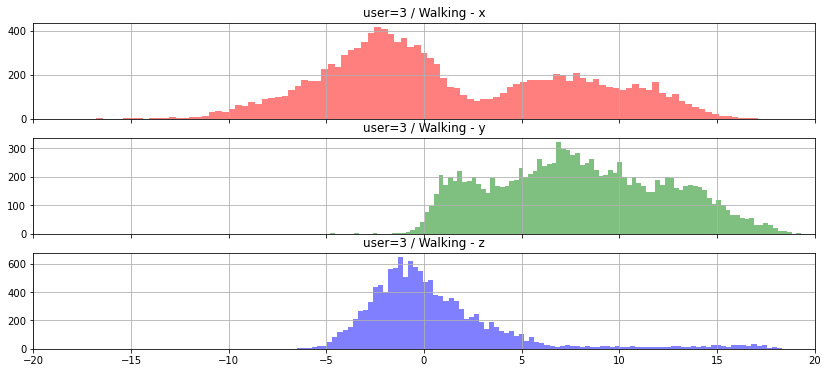

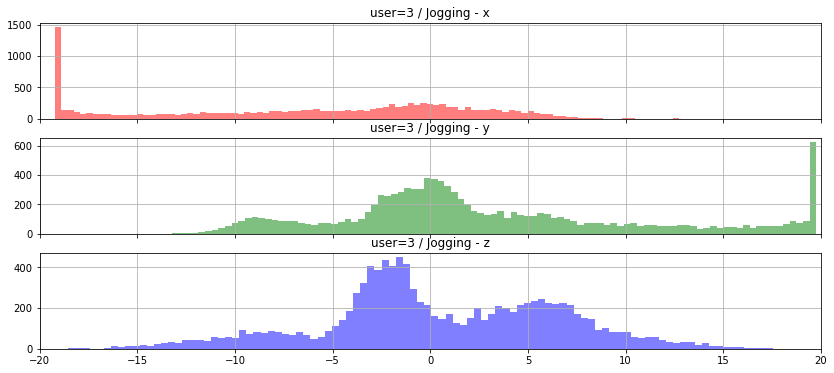

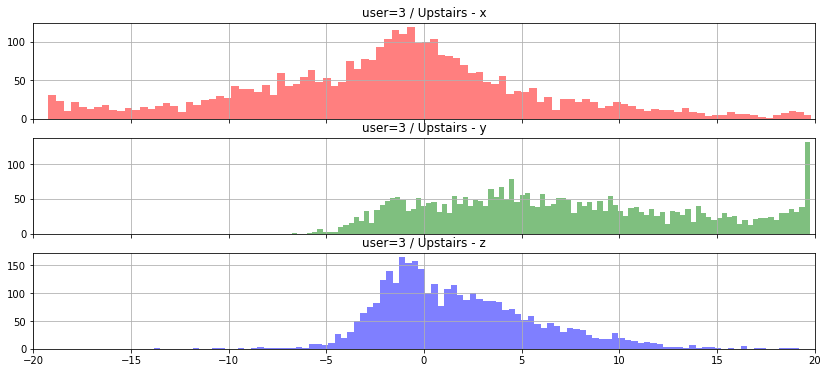

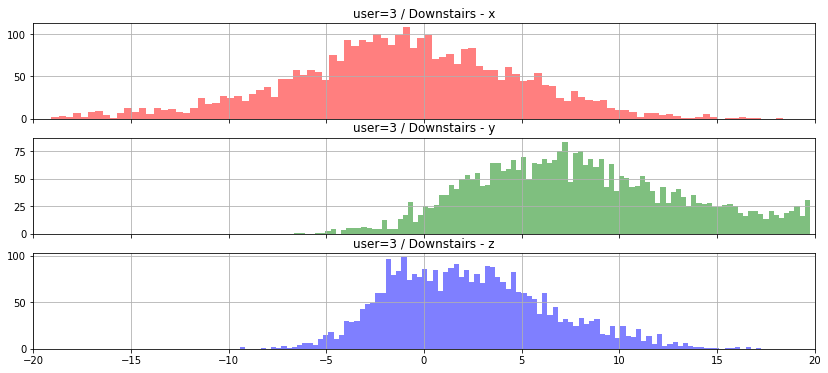

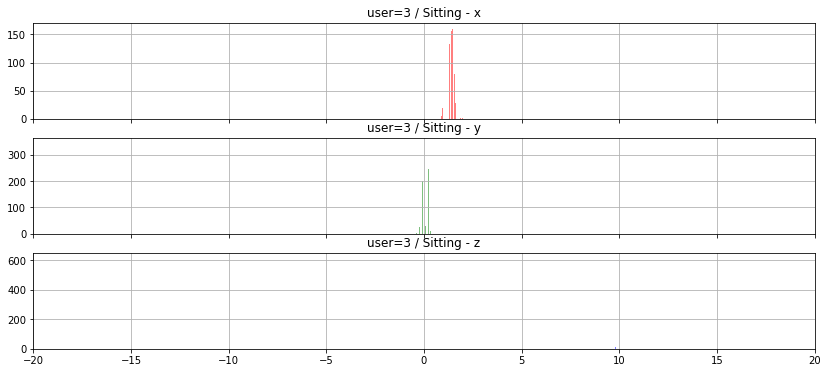

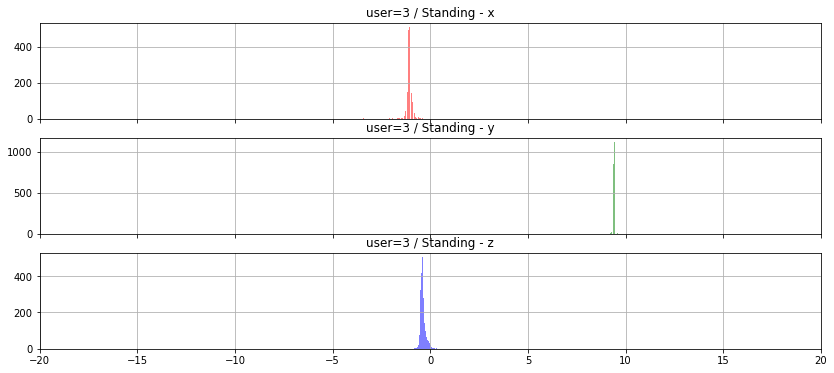

In [82]:
# distribution plots
n_bins = 100

for act in activities:
    data_temp = data_user.loc[data.activity==act].copy()
    data_temp.reset_index(inplace=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    
    ax1.hist(data_temp['x-axis'], bins=n_bins, color='red', alpha=0.5)
    ax1.set_xlim(-20,20)
    ax1.set_title('user=' + str(sel_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.hist(data_temp['y-axis'], bins=n_bins, color='green', alpha=0.5)
    ax2.set_xlim(-20,20)
    ax2.set_title('user=' + str(sel_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.hist(data_temp['z-axis'], bins=n_bins, color='blue', alpha=0.5)
    ax3.set_xlim(-20,20)
    ax3.set_title('user=' + str(sel_user) + ' / ' + act + ' - z')
    ax3.grid()
    
    plt.show()

Walking :


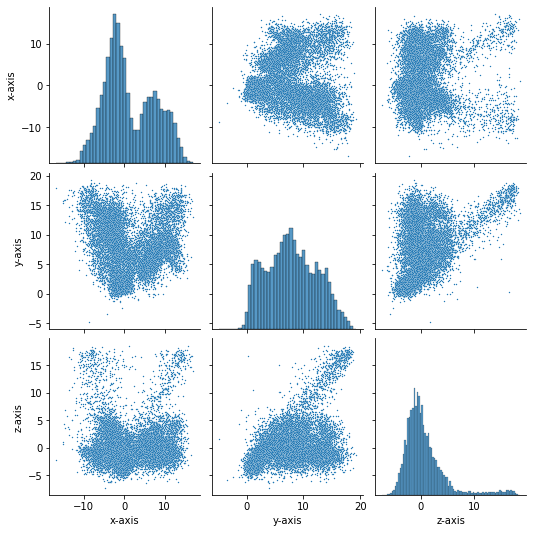

Jogging :


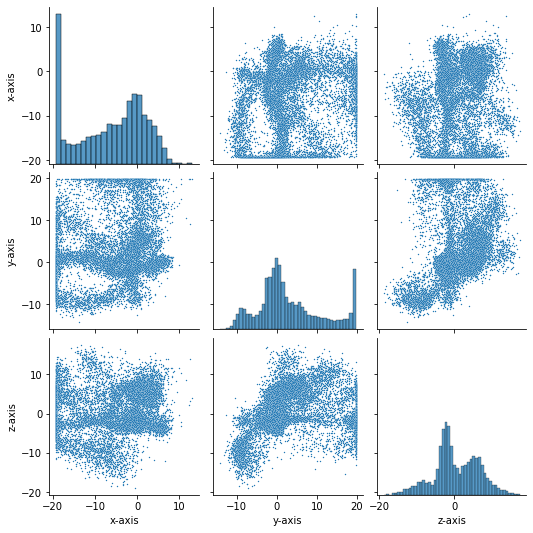

Upstairs :


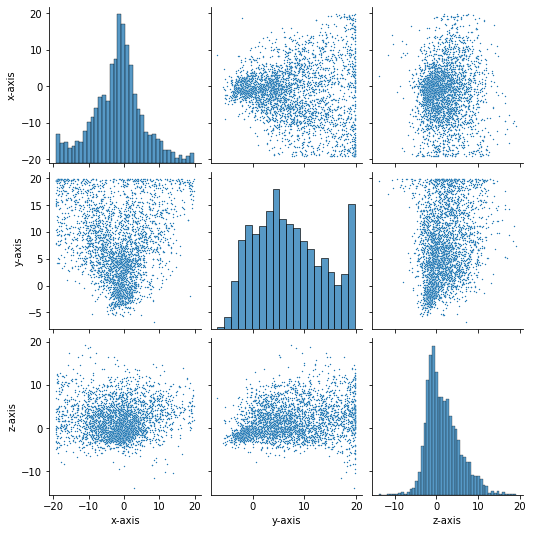

Downstairs :


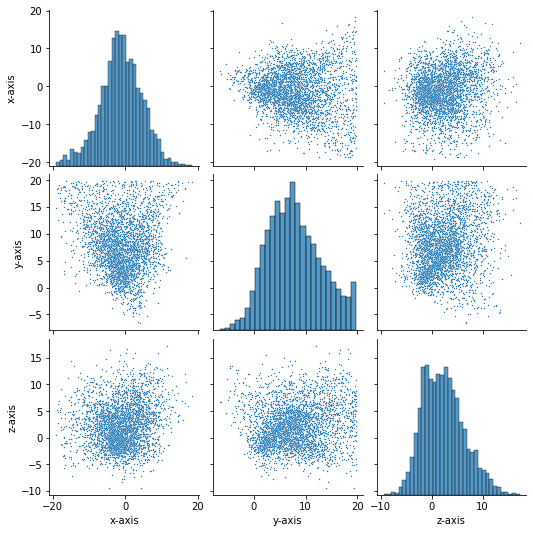

Sitting :


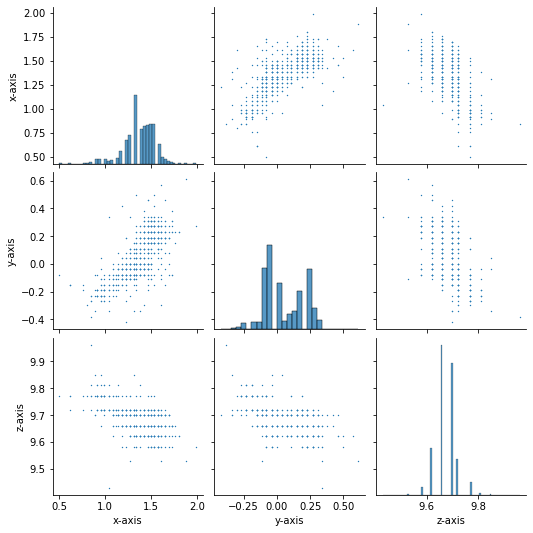

Standing :


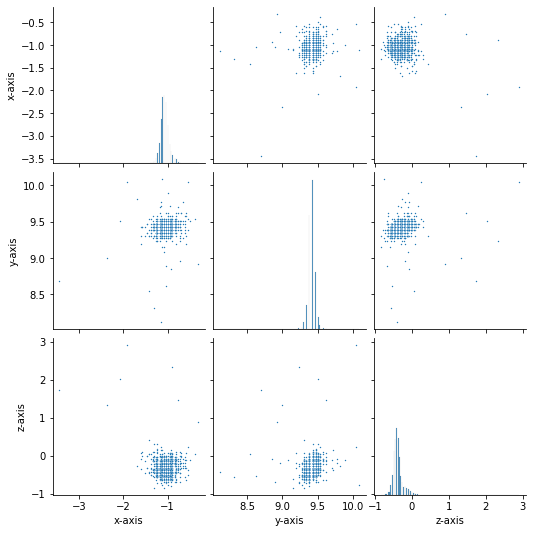

In [83]:
# pairwise scatter plots
for act in activities:
    data_temp = data_user.loc[data.activity==act].copy()
    data_temp.reset_index(inplace=True)
    
    # convert time to seconds and start with 0
    t_min = data_temp.timestamp.min()
    data_temp['time_sec'] = (data_temp['timestamp'] - t_min)/1e9
    
    print(act,':')
    sns.pairplot(data = data_temp[['x-axis','y-axis','z-axis']],
                 plot_kws = dict(s=2))
    plt.show()

In [84]:
stats_by_act = data_user.groupby('activity')[['x-axis','y-axis','z-axis']].std()
stats_by_act

,x-axis,y-axis,z-axis
activity,,,
Downstairs,5.771033,5.208307,4.069624
Jogging,8.114999,7.966063,6.021514
Sitting,0.163183,0.149645,0.040073
Standing,0.125622,0.073809,0.175041
Upstairs,7.321590,6.639742,3.980631
Walking,6.186944,4.394928,3.907049


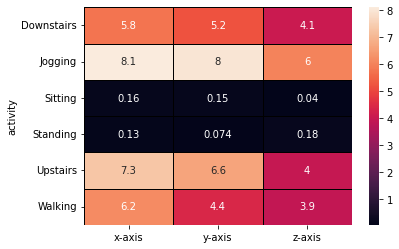

In [85]:
# and a more visual version
sns.heatmap(stats_by_act, annot=True, linewidths=1, linecolor='black')
plt.show()

In [86]:
df = data.drop(['user', 'timestamp'], axis = 1).copy()
df.head()

,activity,x-axis,y-axis,z-axis
0,Walking,0.69,10.80,-2.03
1,Walking,6.85,7.44,-0.50
2,Walking,0.93,5.63,-0.50
3,Walking,-2.11,5.01,-0.69
4,Walking,-4.59,4.29,-1.95


In [87]:
df['activity'].value_counts()

Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: activity, dtype: int64

#Balanced Dataset

In [88]:
Walking = df[df['activity']=='Walking'].head(48393).copy()
Jogging = df[df['activity']=='Jogging'].head(48393).copy()
Upstairs = df[df['activity']=='Upstairs'].head(48393).copy()
Downstairs = df[df['activity']=='Downstairs'].head(48393).copy()
Sitting = df[df['activity']=='Sitting'].head(48393).copy()
Standing = df[df['activity']=='Standing'].copy()

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

C:\Users\DELLS\AppData\Local\Temp\ipykernel_22788\2372989011.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])


(290358, 4)

In [89]:
balanced_data['activity'].value_counts()

Walking       48393
Jogging       48393
Upstairs      48393
Downstairs    48393
Sitting       48393
Standing      48393
Name: activity, dtype: int64

In [90]:
balanced_data.head()

,activity,x-axis,y-axis,z-axis
0,Walking,0.69,10.80,-2.03
1,Walking,6.85,7.44,-0.50
2,Walking,0.93,5.63,-0.50
3,Walking,-2.11,5.01,-0.69
4,Walking,-4.59,4.29,-1.95


In [91]:
balanced_data['activity'].unique()

array(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

In [92]:
new_activity= LabelEncoder()
balanced_data['new_activity'] = new_activity.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x-axis,y-axis,z-axis,new_activity
0,Walking,0.69,10.80,-2.03,5
1,Walking,6.85,7.44,-0.50,5
2,Walking,0.93,5.63,-0.50,5
3,Walking,-2.11,5.01,-0.69,5
4,Walking,-4.59,4.29,-1.95,5


In [93]:
new_activity.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [94]:
X = balanced_data[['x-axis', 'y-axis', 'z-axis']]
y = balanced_data['new_activity']

In [95]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x-axis', 'y-axis', 'z-axis'])
scaled_X['new_activity'] = y.values

scaled_X.head()

,x-axis,y-axis,z-axis,new_activity
0,0.084121,0.725171,-0.777121,5
1,1.077409,0.137029,-0.441979,5
2,0.122821,-0.179798,-0.441979,5
3,-0.367373,-0.288324,-0.483598,5
4,-0.767268,-0.414355,-0.759597,5


In [96]:
import scipy.stats as stats

In [97]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [98]:
def get_frames(data, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(data) - frame_size, hop_size):
        x = data['x-axis'].values[i: i + frame_size]
        y = data['y-axis'].values[i: i + frame_size]
        z = data['z-axis'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(data['new_activity'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape


((7257, 80, 3), (7257,))

In [99]:
48393*6/40

7258.95

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [101]:
X_train.shape,X_test.shape

((5805, 80, 3), (1452, 80, 3))

In [102]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [103]:
X_train = X_train.reshape(5805,80, 3, 1)
X_test = X_test.reshape(1452,80,3,1)

In [104]:
model.predict(X_test)

46/46 [==============================] - 1s 3ms/step


array([[2.3751515e-03, 1.4702453e-04, 2.8029310e-09, 2.3380513e-11,
        1.8665140e-03, 9.9561137e-01],
       [1.3031942e-11, 6.7110693e-24, 1.0000000e+00, 1.1373597e-08,
        6.1149423e-12, 1.4713323e-32],
       [1.3332831e-13, 1.5711937e-30, 1.0000000e+00, 2.3130448e-17,
        4.2744655e-16, 0.0000000e+00],
       ...,
       [1.5626116e-01, 6.1156502e-04, 1.9812231e-05, 6.2231347e-06,
        6.6064650e-01, 1.8245471e-01],
       [2.9892216e-03, 7.7107936e-01, 7.7599962e-09, 8.8126407e-12,
        2.2589119e-01, 4.0188024e-05],
       [2.1478769e-01, 4.2991264e-06, 1.9743371e-04, 1.1495193e-04,
        7.8389895e-01, 9.9665415e-04]], dtype=float32)

In [105]:
X_train.shape

(5805, 80, 3, 1)

In [106]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [107]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
182/182 [==============================] - 4s 14ms/step - loss: 0.9688 - accuracy: 0.6136 - val_loss: 0.5717 - val_accuracy: 0.7583
Epoch 2/10
182/182 [==============================] - 2s 13ms/step - loss: 0.6013 - accuracy: 0.7478 - val_loss: 0.4624 - val_accuracy: 0.7948
Epoch 3/10
182/182 [==============================] - 2s 9ms/step - loss: 0.4885 - accuracy: 0.7986 - val_loss: 0.3949 - val_accuracy: 0.8409
Epoch 4/10
182/182 [==============================] - 2s 12ms/step - loss: 0.4300 - accuracy: 0.8250 - val_loss: 0.3354 - val_accuracy: 0.8733
Epoch 5/10
182/182 [==============================] - 2s 9ms/step - loss: 0.3686 - accuracy: 0.8560 - val_loss: 0.3130 - val_accuracy: 0.8774
Epoch 6/10
182/182 [==============================] - 2s 9ms/step - loss: 0.3299 - accuracy: 0.8734 - val_loss: 0.2749 - val_accuracy: 0.8912
Epoch 7/10
182/182 [==============================] - 1s 8ms/step - loss: 0.2945 - accuracy: 0.8818 - val_loss: 0.2517 - val_accuracy: 0.9015
Epo

In [108]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

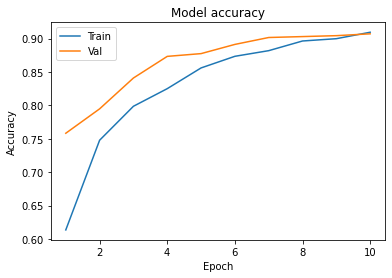

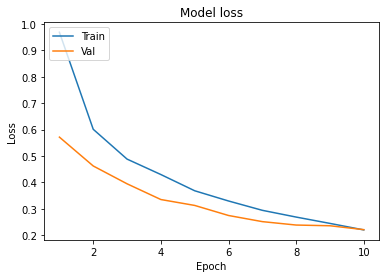

In [109]:
plot_learningCurve(history, 10)